# MGT 286A: Capstone in Business Analytics | Final Project

### By Vishesh Shukla (862464003) and Pious Khemka (862467916)

# Navigating the Financial Tides: A Year in Stock Market Analysis


In [1]:
# !pip install pandas numpy matplotlib seaborn yfinance

In [2]:
# Importing the pandas library and aliasing it as 'pd'
import pandas as pd

# Importing the numpy library and aliasing it as 'np'
import numpy as np

# Importing the pyplot module from the matplotlib library and aliasing it as 'plt'
import matplotlib.pyplot as plt

# Importing the seaborn library and setting the plotting style to 'whitegrid'
import seaborn as sns
sns.set_style('whitegrid')

# Using the magic command '%matplotlib inline' to display matplotlib plots inline in Jupyter notebooks
%matplotlib inline

# Setting the style of matplotlib plots to emulate the style of plots found on FiveThirtyEight
plt.style.use("fivethirtyeight")

In [3]:
# For reading stock data from Yahoo Finance
import yfinance as yf
from datetime import datetime

In [4]:
# Set up start and end dates for data grab
start_date = '2023-01-01'
end_date = '2023-12-31'

In [5]:
# List of the finance stocks we'll use for this analysis
finance_list = ['JPM', 'BAC', 'GS', 'WFC']  # Tickers for JP Morgan Chase, Bank of America, Goldman Sachs, Wells Fargo

In [6]:
# Downloading stock data for each finance stock in the list for the specified date range
for stock in finance_list:
    globals()[stock] = yf.download(stock, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [7]:
# Adding company names as a new column to the dataframes
company_list = [JPM, BAC, GS, WFC]
company_name = ["JP Morgan Chase & Co.", "Bank of America Corp.", "Goldman Sachs", "Wells Fargo"]


In [8]:
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

In [9]:
# Concatenating all finance stock data into a single dataframe
df = pd.concat(company_list, axis=0)

In [10]:
# Displaying a sample of the concatenated dataframe for each company
for company, com_name in zip(company_list, company_name):
    print(f"Sample data for {com_name}:")
    print(company.head(2))  # Displaying the first two rows of data for each company
    print()  # Print an empty line for separation

Sample data for JP Morgan Chase & Co.:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  135.240005  136.740005  133.889999  135.119995  130.404739   
2023-01-04  135.990005  137.679993  135.570007  136.380005  131.620789   

              Volume           company_name  
Date                                         
2023-01-03  11054800  JP Morgan Chase & Co.  
2023-01-04  11687600  JP Morgan Chase & Co.  

Sample data for Bank of America Corp.:
                 Open   High        Low      Close  Adj Close    Volume  \
Date                                                                      
2023-01-03  33.230000  34.09  33.209999  33.509998  32.270805  35221500   
2023-01-04  33.900002  34.82  33.830002  34.139999  32.877502  41998500   

                     company_name  
Date                               
2023-01-03  Bank of America Corp.  
2023-01-04  Bank of America Cor

In [11]:
# Descriptive statistics for the data
print("Descriptive Statistics:")
print(df.describe())
print()

Descriptive Statistics:
              Open         High          Low        Close    Adj Close  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    138.073550   139.450020   136.833420   138.205210   135.177616   
std     122.976737   124.235936   121.893996   123.128558   120.184712   
min      25.320000    25.650000    24.959999    25.170000    24.796028   
25%      36.375000    36.960000    36.235001    36.582500    35.345244   
50%      88.019999    88.225000    86.514999    87.710001    85.799608   
75%     200.862503   202.584999   199.562500   200.202503   198.323601   
max     385.570007   387.760010   383.630005   386.410004   383.690948   

             Volume  
count  1.000000e+03  
mean   2.014586e+07  
std    2.170095e+07  
min    4.601000e+05  
25%    5.641825e+06  
50%    1.290320e+07  
75%    3.006100e+07  
max    2.184033e+08  



In [12]:
# Information about the data
print("Information about the Data:")
print(df.info())
print()

Information about the Data:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2023-01-03 to 2023-12-29
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1000 non-null   float64
 1   High          1000 non-null   float64
 2   Low           1000 non-null   float64
 3   Close         1000 non-null   float64
 4   Adj Close     1000 non-null   float64
 5   Volume        1000 non-null   int64  
 6   company_name  1000 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 62.5+ KB
None



# Change in Price and Investor Sentiment of Stock over Time

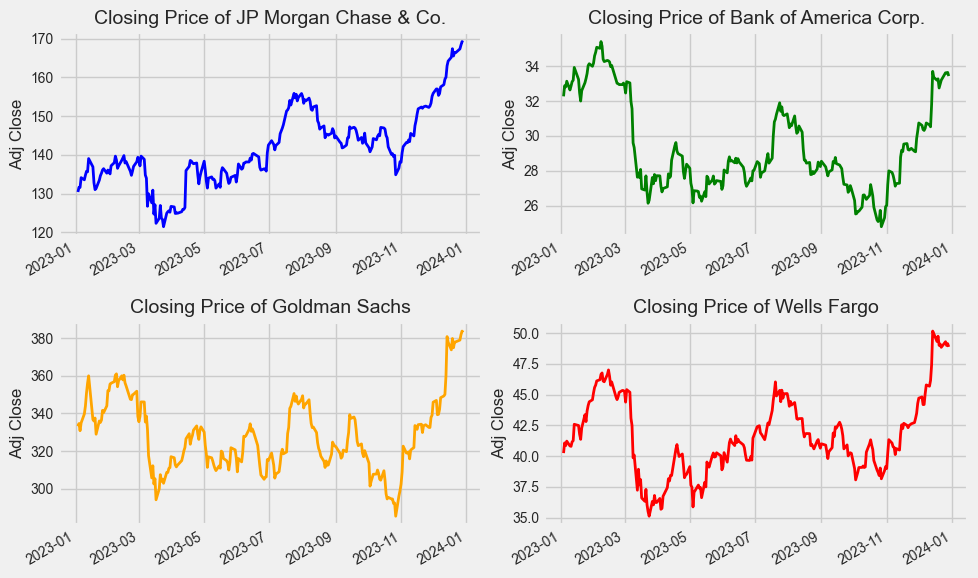

In [13]:
# Closing Price Analysis (Standard benchmark to test performance over time)
plt.figure(figsize=(10, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

# Define custom colors for the lines
colors = ['blue', 'green', 'orange', 'red']

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot(color=colors[i-1], linewidth=2, linestyle='-')  # Customize line color, width, and style
    plt.ylabel('Adj Close', fontsize=12)
    plt.xlabel(None)
    plt.title(f"Closing Price of {company_name[i - 1]}", fontsize=14)
    plt.tick_params(axis='both', which='major', labelsize=10)  # Customize tick labels font size

plt.tight_layout()

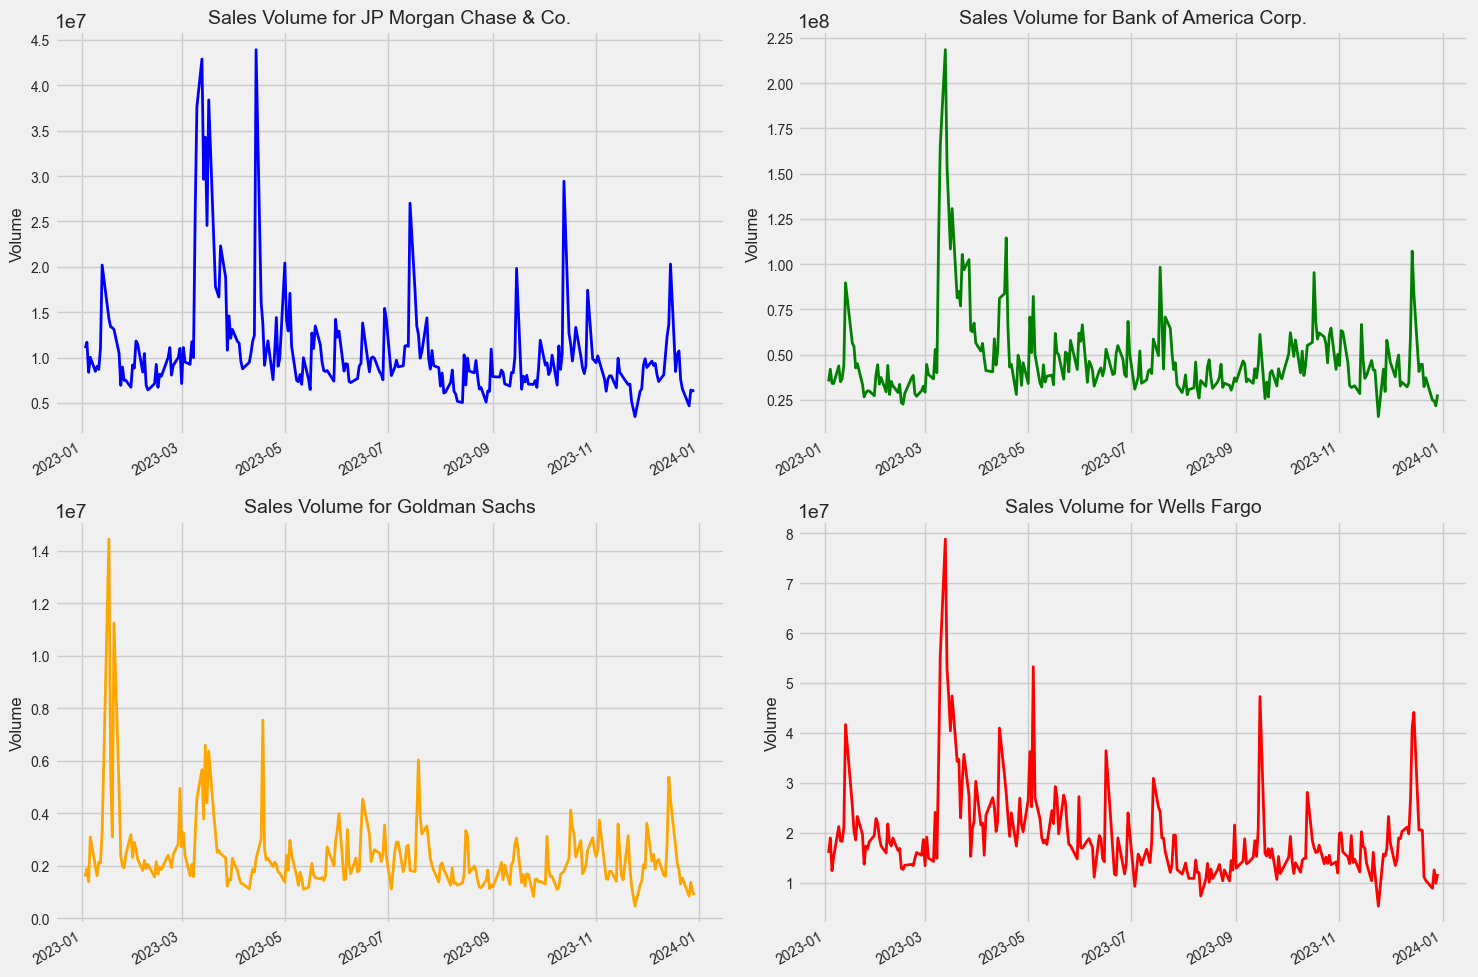

In [14]:
# Volume of Sales (to undertand market activity and investor sentiment)
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot(color=colors[i-1], linewidth=2, linestyle='-')  # Customize line color, width, and style
    plt.ylabel('Volume', fontsize=12)
    plt.xlabel(None)
    plt.title(f"Sales Volume for {company_name[i - 1]}", fontsize=14)
    plt.tick_params(axis='both', which='major', labelsize=10)  # Customize tick labels font size

plt.tight_layout()

# Show plot
plt.show()

# Studying Moving Averages to smooth out short-term fluctuations and highlight longer-term trends in stock prices

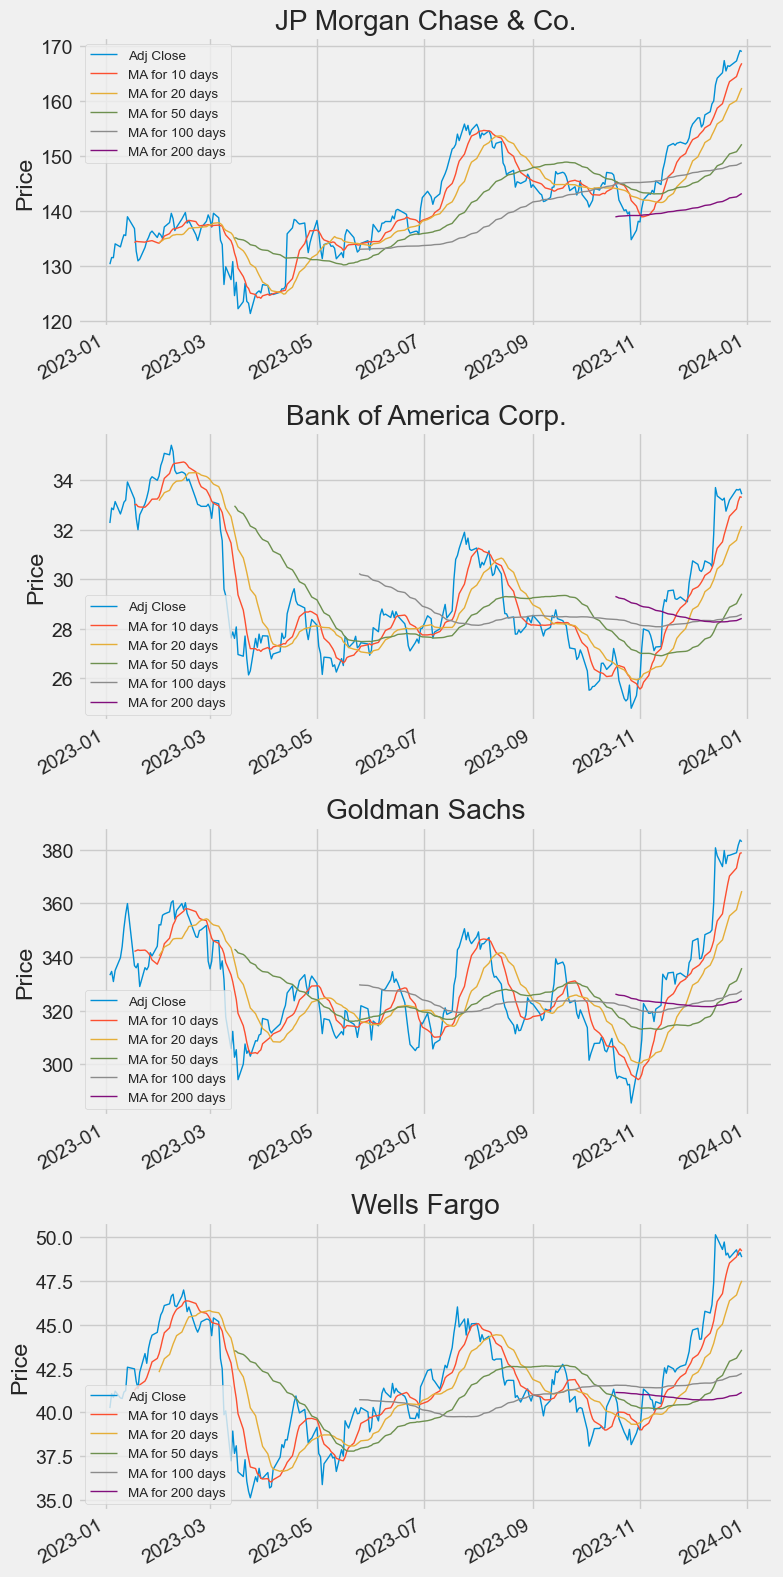

In [15]:
# Define the moving average days
ma_day = [10, 20, 50, 100, 200]  # Adding 100-day and 200-day moving averages

# Compute moving averages for each company and add them to the DataFrame
for company in company_list:
    for ma in ma_day:
        column_name = f'MA for {ma} days'
        company[column_name] = company['Adj Close'].rolling(window=ma).mean()

# Plot the 'Adj Close' price and moving averages for each stock
fig, axes = plt.subplots(nrows=len(company_list), ncols=1, figsize=(8, 4 * len(company_list)))

for i, (company, com_name) in enumerate(zip(company_list, company_name)):
    company_columns = ['Adj Close'] + [f'MA for {ma} days' for ma in ma_day]  # Include all moving averages
    company[company_columns].plot(ax=axes[i], title=com_name, linewidth=1)
    axes[i].set_xlabel(None)
    axes[i].set_ylabel('Price')
    axes[i].legend(['Adj Close'] + [f'MA for {ma} days' for ma in ma_day], fontsize='x-small')  # Include legends for all moving averages

fig.tight_layout()
plt.show()

# Average of the Daily Return of the Stocks over the year

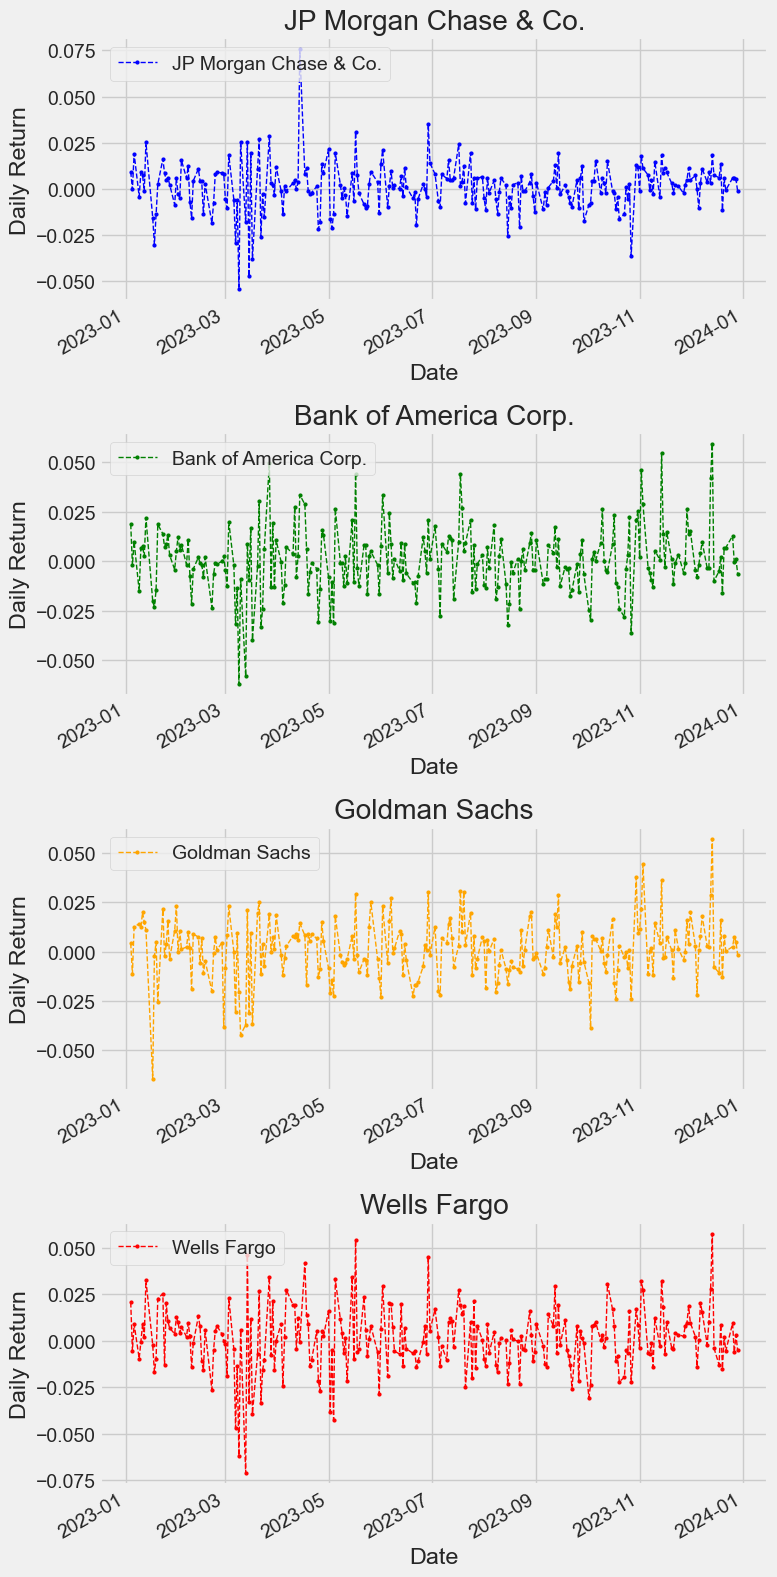

In [16]:
import seaborn as sns

# Calculate the daily returns for each finance stock
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Plot the daily return percentage for each stock
fig, axes = plt.subplots(nrows=len(company_list), ncols=1, figsize=(8, 4 * len(company_list)))

for i, (company, com_name) in enumerate(zip(company_list, company_name)):
    company['Daily Return'].plot(ax=axes[i], legend=True, linestyle='--', marker='o', color=colors[i], linewidth=1, markersize=2)
    axes[i].set_title(com_name)
    axes[i].set_ylabel('Daily Return')
    axes[i].legend([com_name], loc='upper left')

fig.tight_layout()
plt.show()

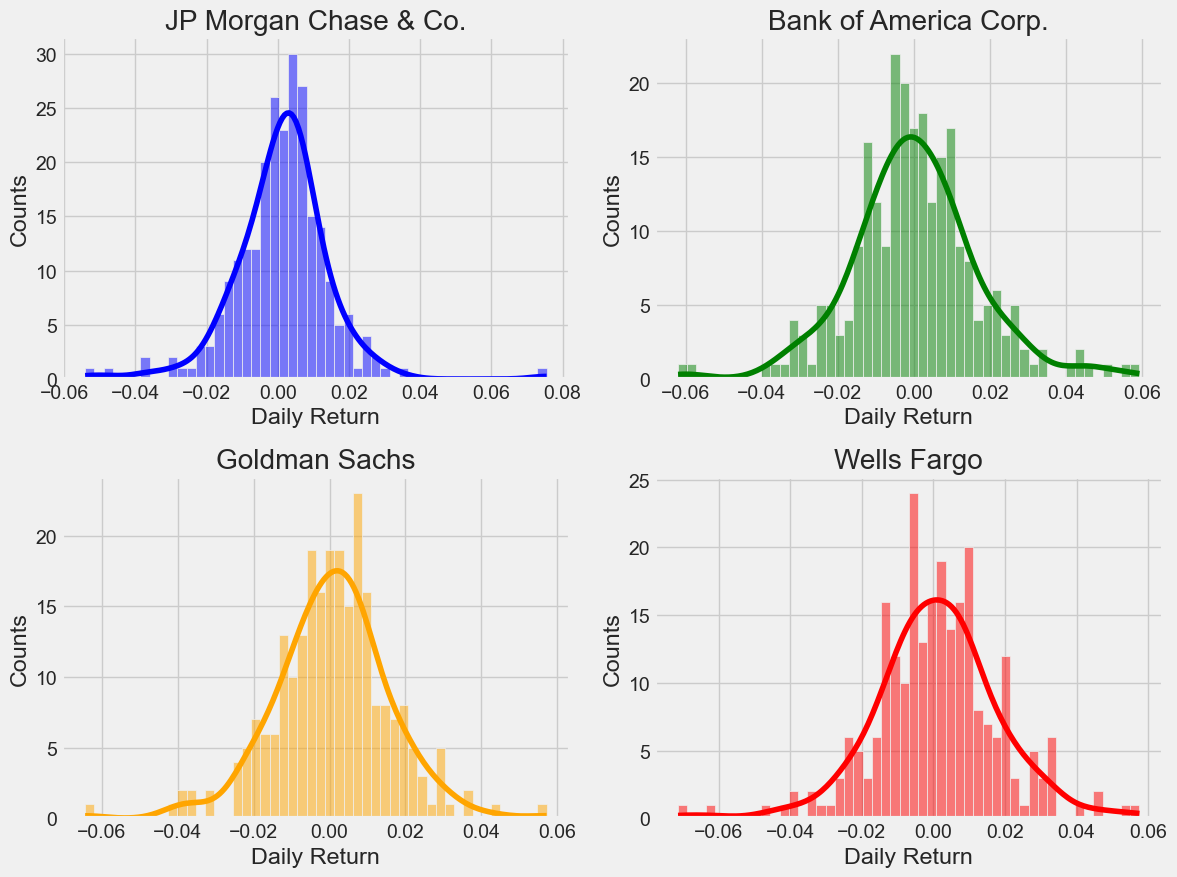

In [17]:
# Plot histograms of daily returns for all stocks
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.histplot(company['Daily Return'], bins=50, color=colors[i - 1], kde=True)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()
plt.show()

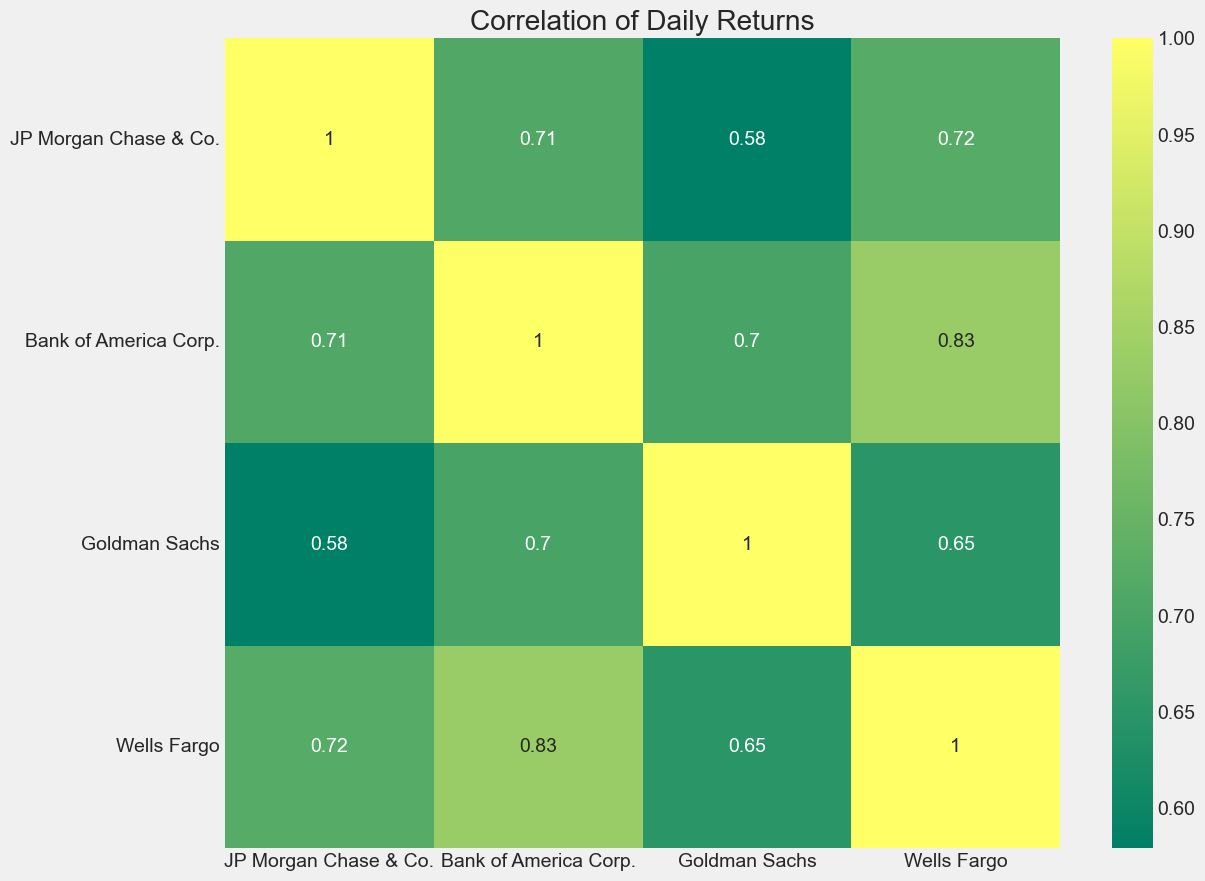

In [18]:
# Create a DataFrame with all the daily returns
tech_rets = pd.DataFrame({company_name[i]: company['Daily Return'] for i, company in enumerate(company_list)})

# Compute correlation matrix of daily returns
correlation_returns = tech_rets.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_returns, annot=True, cmap='summer')
plt.title('Correlation of Daily Returns')
plt.show()

# How much value do we put at risk by investing in a particular stock?

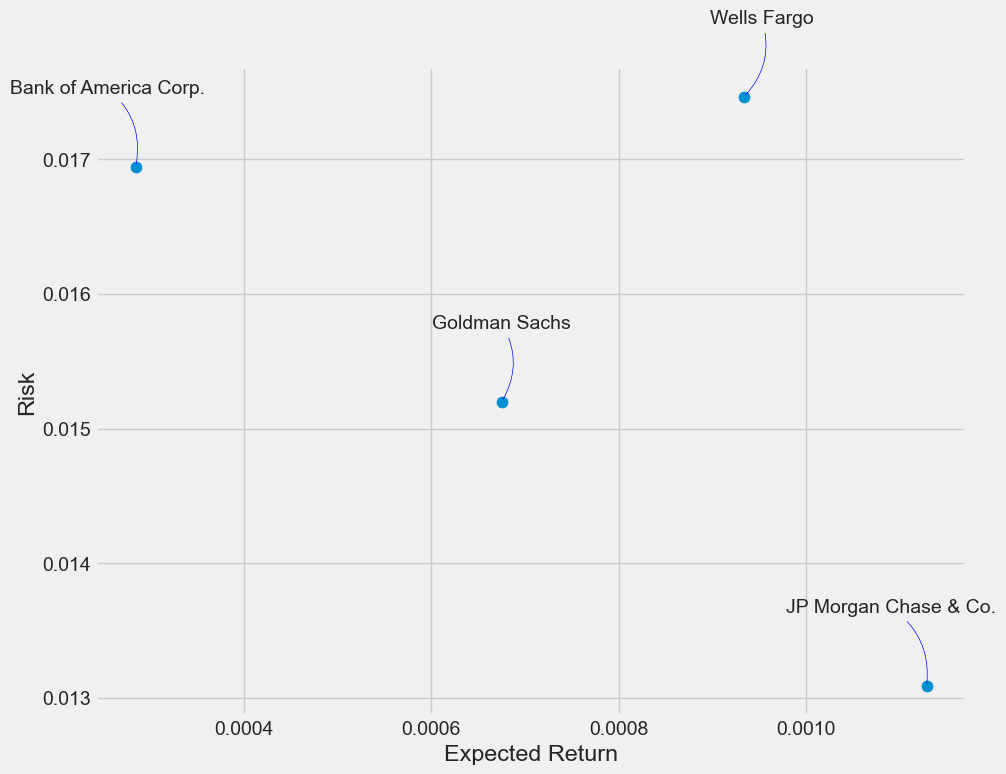

In [19]:
# Calculate the daily returns for each finance stock
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Concatenate all finance stock data into a single DataFrame
df = pd.concat(company_list, axis=1)

# Drop NaN values from daily returns DataFrame
rets = df['Daily Return'].dropna()

# Define area for scatter plot markers
area = np.pi * 20

# Plot expected return vs. risk
plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')
# Annotate each point with company name
for label, x, y in zip(company_name, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color = "blue", connectionstyle='arc3,rad=-0.3'))

plt.show()

[*********************100%%**********************]  1 of 1 completed


1/1 [==============================] - 1s 651ms/step


C:\Users\EndUser\AppData\Local\Temp\ipykernel_26468\194676640.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


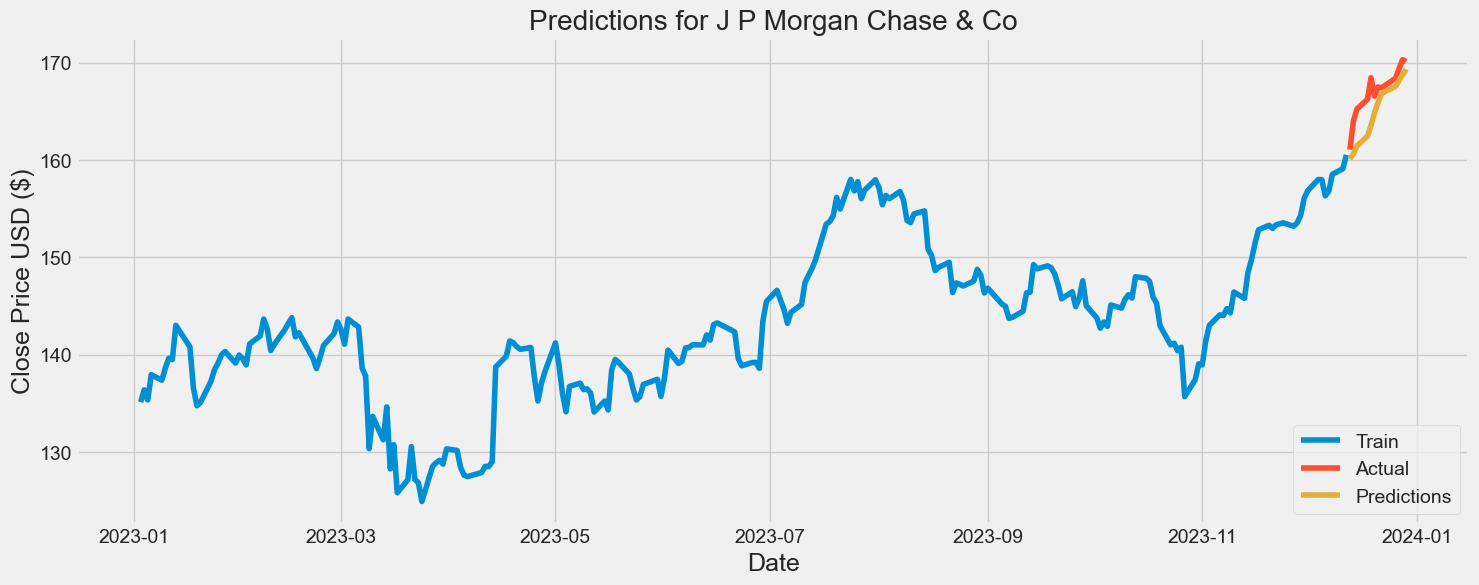

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-12-13  160.520004  162.029999  159.770004  161.059998  160.072937   
2023-12-14  161.830002  164.839996  161.710007  163.990005  162.984985   
2023-12-15  163.080002  165.279999  162.389999  165.229996  164.217377   
2023-12-18  165.919998  167.130005  165.630005  166.229996  165.211243   
2023-12-19  166.000000  168.470001  165.550003  168.449997  167.417648   
2023-12-20  167.990005  169.410004  166.449997  166.550003  165.529297   
2023-12-21  166.839996  168.089996  165.679993  167.500000  166.473465   
2023-12-22  167.500000  168.229996  167.229996  167.399994  166.374069   
2023-12-26  167.460007  168.770004  167.179993  168.389999  167.358017   
2023-12-27  167.839996  169.470001  167.580002  169.399994  168.361816   
2023-12-28  169.350006  170.660004  169.000000  170.300003  169.256317   
2023-12-29  170.000000  170.690002  16

In [22]:
#!pip install scikit-learn
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Function to get stock data
def get_stock_data(symbol, start_date, end_date):
    return yf.download(symbol, start=start_date, end=end_date)

# Retrieving stock data for your company from Yahoo Finance
company_symbol = 'JPM'
start_date = '2023-01-01'
end_date = '2023-12-31'
company_data = get_stock_data(company_symbol, start_date, end_date)

# Preprocessing the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(company_data['Close'].values.reshape(-1, 1))

# Creating training dataset
training_data_len = int(np.ceil(len(scaled_data) * .95))
train_data = scaled_data[:training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Building the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

# Creating testing dataset
test_data = scaled_data[training_data_len - 60:, :]
x_test = []

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Making predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Visualizing the results
train = company_data[:training_data_len]
valid = company_data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16, 6))
plt.title('Predictions for J P Morgan Chase & Co')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predictions'], loc='lower right')
plt.show()

# Displaying the valid and predicted prices
print(valid)

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Calculate validation targets (actual closing prices)
y_test = company_data['Close'].values[training_data_len:]

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)

# Print the error metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)


1/1 [==============================] - 0s 40ms/step
Mean Squared Error (MSE): 6.317880423176878
Mean Absolute Error (MAE): 2.085669199625651
